## Demo for depth labelling

Depth labelling implemented based on [(Piccinelli et al., 2024)](https://github.com/lpiccinelli-eth/UniDepth). 
Input is an rgb image, output the estimated depth within the image in m


In [14]:
## Import unidepth model 
from unidepth.models import UniDepthV1
import torch
import numpy as np
import os 
import cv2 
from PIL import Image
import matplotlib.pyplot as plt

# Get the basic instantiation
model = UniDepthV1.from_pretrained("lpiccinelli/unidepth-v1-vitl14") # or "lpiccinelli/unidepth-v1-cnvnxtl" for the ConvNext backbone

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Instantiate: dinov2_vitl14


In [15]:
# Load an image 
Datapath = "../../../Data/"
# Get an example image 
print(os.path.join(Datapath,"Image1.png"))
im = np.array(Image.open(os.path.join(Datapath,"Image1.png")))

../../../Data/Image1.png


In [16]:
# Load the RGB image and the normalization will be taken care of by the model
rgb = torch.from_numpy(im).permute(2, 0, 1) # C, H, W

predictions = model.infer(rgb)

# Metric Depth Estimation
depth = predictions["depth"]


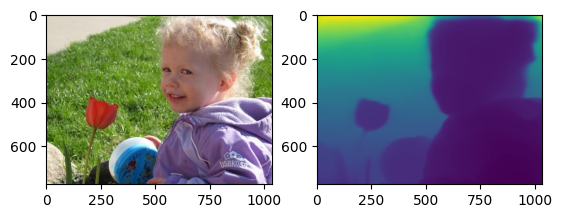

In [17]:
depthmap = torch.Tensor.cpu(depth).numpy() # get the depthmap 
depthmap = depthmap[0,0,:,:] 

## Visualize the results
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(im)
ax2.imshow(depthmap)

Fixation Distance is  2.2164273 m


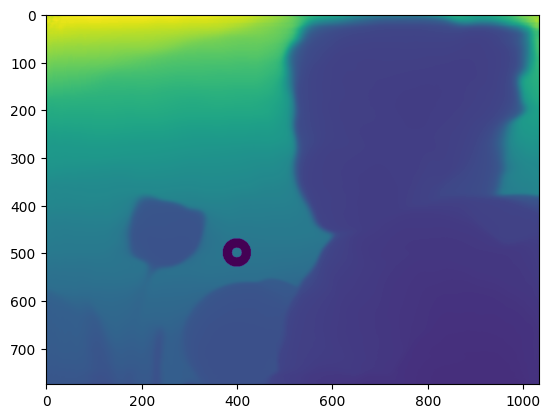

In [18]:
## Show an example how to get the category for a fixated pixel 

X = 400
Y = 500
InnerRadius = 10 # Inner radius of the gaze overlay
OuterRadius = 30 # Outer radius of the gaze overlay

FixPix = depthmap[Y,X] # this is the object id someone fixated 

# Add the gaze position 
X_Vec = np.arange(1,round(depthmap.shape[1]+1))-X
Y_Vec = np.arange(1,round(depthmap.shape[0]+1))-Y
x,y = np.meshgrid(X_Vec,Y_Vec)
Dist = np.sqrt(x**2+y**2)

 # Find which pixels in the image need to be changed
circ = np.array(np.where((Dist > InnerRadius) & (Dist < OuterRadius)))
test = depthmap[circ[0],circ[1]]
depthmap[circ[0],circ[1]] =0

plt.figure
plt.imshow(depthmap)

print('Fixation Distance is ', FixPix, 'm')